#           Mrityunjay Kumar Pandey

### Task2 -: To Explore Supervised Machine Learning

### Goal is to predict score if a student study for 9.25 hrs in a day.

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Importing the dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Exploratory Data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

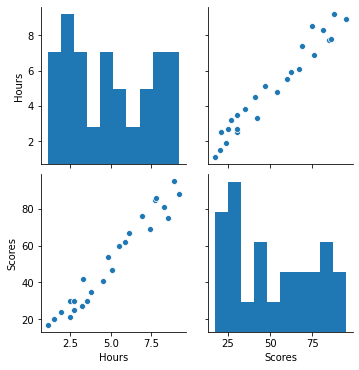

In [5]:
sns.pairplot(df)

#### From the above chart it is crystal clear that the Scores shows the positive correlation with number of hours of study.

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


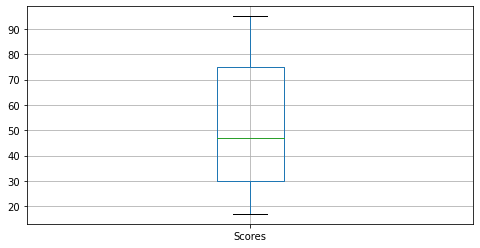

In [7]:
plt.figure(figsize=(8,4))
df.boxplot('Scores')

#### From the above chart it is crystal clear that the Scores has no outlier

In [8]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


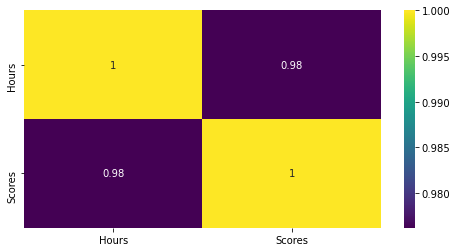

In [9]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

#### From the above chart it is crystal clear that the Scores shows the positive correlation 98% with Hours column

In [10]:
df.corr()['Hours'].sort_values()

Scores    0.976191
Hours     1.000000
Name: Hours, dtype: float64

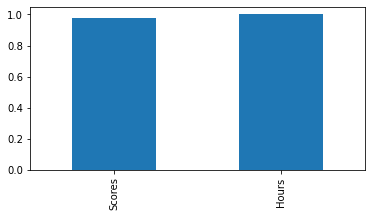

In [11]:
plt.figure(figsize=(6,3))
df.corr()['Hours'].sort_values().plot(kind='bar')

## Splitting the dataset into the Training set and Test set

In [12]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

## Training & Evaluating the Model Performance

In [14]:
models = []
models.append(('LiR',LinearRegression()))
models.append(('SVR',SVR(kernel='rbf')))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('RFR',RandomForestRegressor(n_estimators=11)))

for name,model in models:
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print(f'{name}\n R2: {r2_score(ytest,ypred)}\nMSE:-{mean_squared_error(ytest,ypred)}\nRMSE:-{np.sqrt(mean_squared_error(ytest,ypred))}\n')
    

LiR
 R2: 0.9454906892105355
MSE:-21.598769307217413
RMSE:-4.647447612100368

SVR
 R2: 0.2817561884472334
MSE:-284.5969278896682
RMSE:-16.87000082660544

DTR
 R2: 0.6991722188572582
MSE:-119.2
RMSE:-10.917875251164945

RFR
 R2: 0.8019815732995762
MSE:-78.46282139577593
RMSE:-8.857924214835885



#### As we can see from above model performence that the Linear Regression model gives the bestfit model with manimum loss

## Bestfit Model

In [15]:
#using Linear Regression
linreg = LinearRegression()  
linreg.fit(xtrain, ytrain)

LinearRegression()

## Predicting testset

In [16]:
ypred = linreg.predict(xtest)

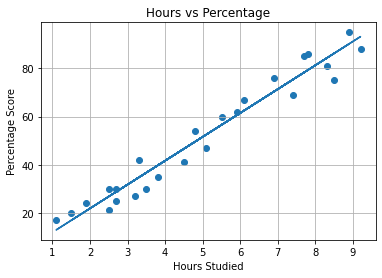

In [17]:
# Plotting the regression line
line = linreg.coef_*x+linreg.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.grid(True)
plt.show()

## Bestfit Model Performance

In [18]:
print(f'R2: {r2_score(ytest,ypred)}\nMSE:-{mean_squared_error(ytest,ypred)}\nRMSE:-{np.sqrt(mean_squared_error(ytest,ypred))}\n')


R2: 0.9454906892105355
MSE:-21.598769307217413
RMSE:-4.647447612100368



## Comparing results

In [19]:
res = pd.DataFrame({'Actual': ytest, 'Predicted': ypred})  
res 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# What is the predicted score if a student study for 9.25 hrs in a day.

In [20]:
# Single Prediction
Singlepred = linreg.predict([[9.25]])
print(f"No of Hours = {9.25}")
print(f"Predicted Score = {Singlepred[0]}")

No of Hours = 9.25
Predicted Score = 93.69173248737538
